In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Identity metrics

In [21]:
identity_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/dim_100_sweep/split3/identity_ood_metrics_encoded_3.csv",
                              index_col=0)

In [22]:
identity_metrics.mean(1)

r_squared            0.955717
sinkhorn_div_1      12.034006
sinkhorn_div_10      5.240759
sinkhorn_div_100     3.445099
e_distance           6.612575
mmd                  0.023295
dtype: float64

CellFlow

In [23]:
cellflow_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/dim_100_sweep/split3/ood_metrics_encoded_3.csv",
                              index_col=0)

In [24]:
cellflow_metrics.mean(1)

r_squared            0.961033
sinkhorn_div_1      12.908993
sinkhorn_div_10      5.812544
sinkhorn_div_100     3.197209
e_distance           5.939983
mmd                  0.021052
dtype: float64

Metrics

In [25]:
# mean_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/dim_100_sweep/split3/mean_train_metrics_encoded_3.csv",
#                               index_col=0)

In [26]:
# mean_metrics.mean(1)

## Get gene list by distance from the controls 

In [27]:
identity_deg = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/dim_100_sweep/split3/identity_ood_metrics_ood_3.csv",
                              index_col=0)

In [28]:
gene_list = identity_deg.T.sort_values(by="r_squared")
gene_list["perturbation"] = gene_list.index.copy()
gene_list = gene_list.reset_index(drop=True)

In [29]:
n_splits = 5
gene_list["Perturbation effect"] = None

range_cond = np.arange(len(gene_list))
range_cond_split = np.array_split(range_cond,n_splits)
for i, idx_list in enumerate(range_cond_split):
    gene_list.loc[idx_list, "Perturbation effect"] = i
gene_list = gene_list.set_index("perturbation") 

# Plot comparisons

In [30]:
merged = pd.concat([identity_metrics, cellflow_metrics], axis=1).T

In [31]:
merged["Model"] = ["Identity"]*identity_metrics.shape[1] + ["cellFlow"]*cellflow_metrics.shape[1]

In [32]:
perturbation_cat = []
for pert in merged.index:
    perturbation_cat.append(gene_list.loc[pert, "Perturbation effect"])
merged["Perturbation effect"] = perturbation_cat

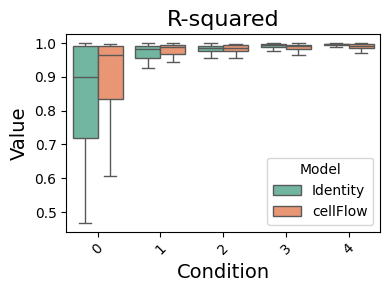

In [39]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="r_squared", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("R-squared", fontsize=16)
plt.xlabel("Condition", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

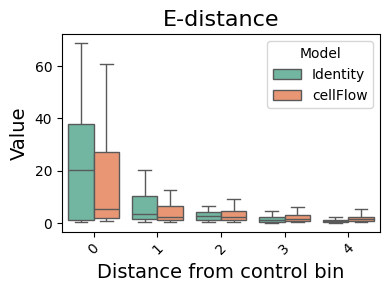

In [40]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="e_distance", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("E-distance", fontsize=16)
plt.xlabel("Distance from control bin", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [41]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="sinkhorn_div_1", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("Sinkhorn 1", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [36]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="sinkhorn_div_10", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("Sinkhorn 10", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [37]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="sinkhorn_div_100", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("Sinkhorn 100", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [38]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="mmd", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("MMD", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
s